In [131]:
%cd ../../../data/round3/days/

/Users/IvanTang/quant/IMC_Prosperity3_GraniteFlow/data/round3/days


In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df0 = pd.read_csv('day0.csv')
df1 = pd.read_csv('day1.csv')
df1['timestamp'] = df1['timestamp'] + 1000000
df2 = pd.read_csv('day2.csv')
df2['timestamp'] = df2['timestamp'] + 2000000
df = pd.concat([df0, df1, df2], ignore_index=True)


In [134]:
print(df.columns)

Index(['timestamp', 'VOLCANIC_ROCK', 'VOLCANIC_ROCK_VOUCHER_9500',
       'VOLCANIC_ROCK_VOUCHER_9750', 'VOLCANIC_ROCK_VOUCHER_10000',
       'VOLCANIC_ROCK_VOUCHER_10250', 'VOLCANIC_ROCK_VOUCHER_10500', 'T',
       'iv_9500', 'iv_9750', 'iv_10000', 'iv_10250', 'iv_10500', 'm_9500',
       'm_9750', 'm_10000', 'm_10250', 'm_10500', 'beta_0', 'beta_1', 'beta_2',
       'base_iv'],
      dtype='object')


In [135]:
slice = df[df['timestamp'] == 100000]

In [136]:
slice

,timestamp,VOLCANIC_ROCK,VOLCANIC_ROCK_VOUCHER_9500,VOLCANIC_ROCK_VOUCHER_9750,VOLCANIC_ROCK_VOUCHER_10000,VOLCANIC_ROCK_VOUCHER_10250,VOLCANIC_ROCK_VOUCHER_10500,T,iv_9500,iv_9750,...,iv_10500,m_9500,m_9750,m_10000,m_10250,m_10500,beta_0,beta_1,beta_2,base_iv
1000,100000,10448.0,948.5,698.5,452.5,225.5,71.5,0.027381,0.219558,0.16503,...,0.137761,-0.574833,-0.417855,-0.264851,-0.115626,0.030003,0.138371,0.044314,0.311675,0.138371


In [137]:
ivs = np.array([slice['iv_9500'].values[0], slice['iv_9750'].values[0], slice['iv_10000'].values[0], slice['iv_10250'].values[0], slice['iv_10500'].values[0]])
ms = np.array([slice['m_9500'].values[0], slice['m_9750'].values[0], slice['m_10000'].values[0], slice['m_10250'].values[0], slice['m_10500'].values[0]])
beta0, beta1, beta2 = slice['beta_0'].values[0], slice['beta_1'].values[0], slice['beta_2'].values[0]
base_iv = slice['base_iv'].values[0]

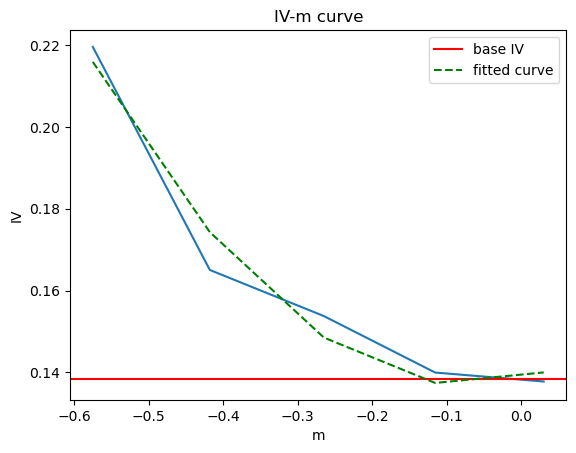

In [138]:
plt.plot(ms, ivs)
plt.xlabel('m')   
plt.ylabel('IV')  
plt.title('IV-m curve')
#横线
plt.axhline(y=base_iv, color='r', linestyle='-', label = 'base IV')
#用beta0, beta1, beta2画出拟合曲线
plt.plot(ms, beta0 + beta1*ms + beta2*ms**2, color='g', linestyle='--', label = 'fitted curve')
plt.legend()

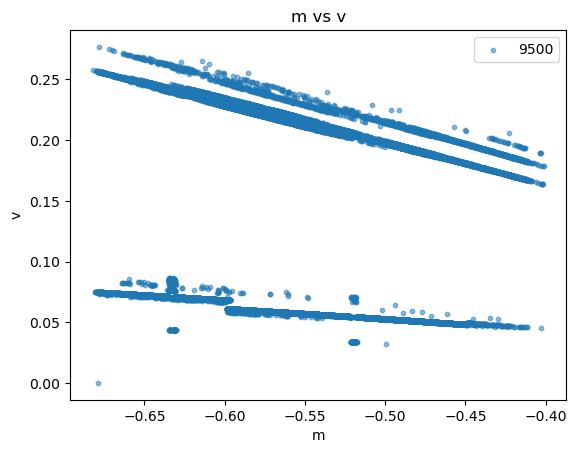

In [171]:
#画出m, v散点图
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(df['m_9500'], df['iv_9500'], s=10, alpha=0.5, label = '9500')
#plt.scatter(df['m_9750'], df['iv_9750'], s=10, alpha=0.5, label = '9750')
#plt.scatter(df['m_10000'], df['iv_10000'], s=10, alpha=0.5, label = '10000')
#plt.scatter(df['m_10250'], df['iv_10250'], s=10, alpha=0.5, label = '10250')
#plt.scatter(df['m_10500'], df['iv_10500'], s=10, alpha=0.5, label = '10500')
plt.title('m vs v')
plt.xlabel('m')
plt.ylabel('v')
plt.legend()
plt.show()
